<a href="https://colab.research.google.com/github/Elwing-Chou/ximen0725/blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
from urllib.request import urlretrieve
url = "https://github.com/Elwing-Chou/ximen0725/raw/main/titanic/train.csv"
urlretrieve(url, "train.csv")
url = "https://github.com/Elwing-Chou/ximen0725/raw/main/titanic/test.csv"
urlretrieve(url, "test.csv")

('test.csv', <http.client.HTTPMessage at 0x7ceed92578b0>)

In [65]:
import pandas as pd
datas = pd.read_csv("train.csv", encoding="utf-8")
datas_predict = pd.read_csv("test.csv", encoding="utf-8")

In [66]:
datas_predict

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [67]:
# demo: concat
d1 = pd.DataFrame([
    [1, 2],
    [3, 4]
])
d2 = pd.DataFrame([
    [5, 6],
    [7, 8]
])
pd.concat([d1, d2], axis=0)

,0,1
0,1,2
1,3,4
0,5,6
1,7,8


In [68]:
datas_total = pd.concat([datas, datas_predict], axis=0)
datas_total = datas_total.drop(["PassengerId", "Survived"], axis=1)
datas_total

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
413,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [69]:
# demo:
# list型態[0]: [0]操作
# func型態(4.2): (4.2)操作
b = int
b(4.2)
import random
if random.randint(0, 1) == 0:
    b = int
else:
    b = round
b(4.6)

4

In [70]:
# 轉換: Series(1D).apply(函式型態)
# demo: apply
s = pd.Series([1, 2, 3, 4])
def func(n):
    return n ** 2
s.apply(func)

0     1
1     4
2     9
3    16
dtype: int64

In [71]:
def name(n):
    # n = "Braund, Mr. Owen Harris"
    return n.split(",")[-1].split(".")[0].strip()
datas_total["Name"] = datas_total["Name"].apply(name)

In [72]:
# value_counts()
counts = datas_total["Ticket"].value_counts()
def ticket(t):
    return counts[t]
datas_total["Ticket"] = datas_total["Ticket"].apply(ticket)

In [73]:
def cabin(c):
    if pd.isna(c):
        return c
    else:
        return c[0]
datas_total["Cabin"] = datas_total["Cabin"].apply(cabin)

In [74]:
datas_total

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,Mr,male,22.0,1,0,1,7.2500,NaN,S
1,1,Mrs,female,38.0,1,0,2,71.2833,C,C
2,3,Miss,female,26.0,0,0,1,7.9250,NaN,S
3,1,Mrs,female,35.0,1,0,2,53.1000,C,S
4,3,Mr,male,35.0,0,0,1,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
413,3,Mr,male,NaN,0,0,1,8.0500,NaN,S
414,1,Dona,female,39.0,0,0,3,108.9000,C,C
415,3,Mr,male,38.5,0,0,1,7.2500,NaN,S
416,3,Mr,male,NaN,0,0,1,8.0500,NaN,S


X!!!!!!!!

1. 類別型態: Pclass, Name, Sex, Cabin, Embarked
2. 數值型態: Age, SibSp, Parch, Ticket, Fare

捕最可能

1. 類別: 最常出現
2. 數值: 中位數

In [92]:
s = datas_total.isna().sum()
fil = s > 0
s[fil].sort_values(ascending=False)

Series([], dtype: int64)

In [76]:
# demo: 篩選 Series/DataFrame[帶入跟資料筆數依樣多的T/F]
d = pd.DataFrame([
    [1, 2],
    [3, 4],
    [5, 6]
])
d[[True, False, False]]

,0,1
0,1,2


In [77]:
most = datas_total["Embarked"].value_counts().idxmax()
datas_total["Embarked"] = datas_total["Embarked"].fillna(most)

In [81]:
med = datas_total.median(numeric_only=True).drop("Pclass")
datas_total = datas_total.fillna(med)

<ipython-input-81-a074ffc3333c>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  med = datas_total.median().drop("Pclass")


In [89]:
c = datas_total["Name"].value_counts()
reserved = c[c > 50].index
def name2(n):
    if n in reserved:
        return n
    else:
        return None
datas_total["Name"] = datas_total["Name"].apply(name2)

可以不做one-hot encoding的情況

1. 有大小關係類別: Pclass
2. 二值型類別: Sex

In [91]:
datas_total = pd.get_dummies(datas_total)
datas_total = pd.get_dummies(datas_total, columns=["Pclass"])
datas_total

,Age,SibSp,Parch,Ticket,Fare,Name_Master,Name_Miss,Name_Mr,Name_Mrs,Sex_female,...,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,22.0,1,0,1,7.2500,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
1,38.0,1,0,2,71.2833,0,0,0,1,1,...,0,0,0,0,1,0,0,1,0,0
2,26.0,0,0,1,7.9250,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,1
3,35.0,1,0,2,53.1000,0,0,0,1,1,...,0,0,0,0,0,0,1,1,0,0
4,35.0,0,0,1,8.0500,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,28.0,0,0,1,8.0500,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
414,39.0,0,0,3,108.9000,0,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0
415,38.5,0,0,1,7.2500,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
416,28.0,0,0,1,8.0500,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1


In [93]:
datas_total["Family"] = datas_total["SibSp"] + datas_total["Parch"]
datas_total

,Age,SibSp,Parch,Ticket,Fare,Name_Master,Name_Miss,Name_Mr,Name_Mrs,Sex_female,...,Cabin_F,Cabin_G,Cabin_T,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Family
0,22.0,1,0,1,7.2500,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,1
1,38.0,1,0,2,71.2833,0,0,0,1,1,...,0,0,0,1,0,0,1,0,0,1
2,26.0,0,0,1,7.9250,0,1,0,0,1,...,0,0,0,0,0,1,0,0,1,0
3,35.0,1,0,2,53.1000,0,0,0,1,1,...,0,0,0,0,0,1,1,0,0,1
4,35.0,0,0,1,8.0500,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,28.0,0,0,1,8.0500,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
414,39.0,0,0,3,108.9000,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0
415,38.5,0,0,1,7.2500,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
416,28.0,0,0,1,8.0500,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0


In [96]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
datas_total_scaled = pd.DataFrame(scaler.fit_transform(datas_total),
                  columns=datas_total.columns)

In [101]:
# demo: iloc(看你是第幾筆) loc(列標籤)
x = datas_total.iloc[:len(datas)]
x_predict = datas_total.iloc[len(datas):]

In [102]:
x_scaled = datas_total_scaled.iloc[:len(datas)]
x_predict_scaled = datas_total_scaled.iloc[len(datas):]

In [ ]:
y = datas["Survived"]
y

In [108]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()
params = {
    "n_neighbors":range(2, 20)
}
search = GridSearchCV(clf, params, cv=10, n_jobs=-1)
search.fit(x_scaled, y)
print(search.best_score_)
print(search.best_params_)

0.832796504369538
{'n_neighbors': 7}


In [111]:
# 靠賽的話是11
clf = KNeighborsClassifier(n_neighbors=11)
clf.fit(x_scaled, y)
pre = clf.predict(x_predict_scaled)
result = pd.DataFrame({
   "PassengerId":datas_predict["PassengerId"],
   "Survived":pre
})
result.to_csv("knn.csv", encoding="utf-8", index=False)

In [112]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
# !!回家可以擴大範圍
params = {
    "n_estimators":range(21, 50, 2),
    "max_depth":range(4, 9)
}
search = GridSearchCV(clf, params, cv=10, n_jobs=-1)
search.fit(x, y)
print(search.best_score_)
print(search.best_params_)

0.8395255930087389
{'max_depth': 6, 'n_estimators': 31}


In [113]:
# 靠賽的話是11
clf = RandomForestClassifier(n_estimators=31, max_depth=6)
clf.fit(x, y)
pre = clf.predict(x_predict)
result = pd.DataFrame({
   "PassengerId":datas_predict["PassengerId"],
   "Survived":pre
})
result.to_csv("rf.csv", encoding="utf-8", index=False)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(10, 10))
# 0~30
plot_tree(clf.estimators_[1],
     feature_names=x.columns,
     class_names=["Victim", "Survivor"],
     filled=True,
     max_depth=2)

In [ ]:
imp = pd.Series(clf.feature_importances_, index=x.columns)
imp.sort_values(ascending=False)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x=datas["Sex"],
       hue=datas["Survived"])

title

axis

label(x, y軸標籤)

ticks(刻度)

lenend(圖例)

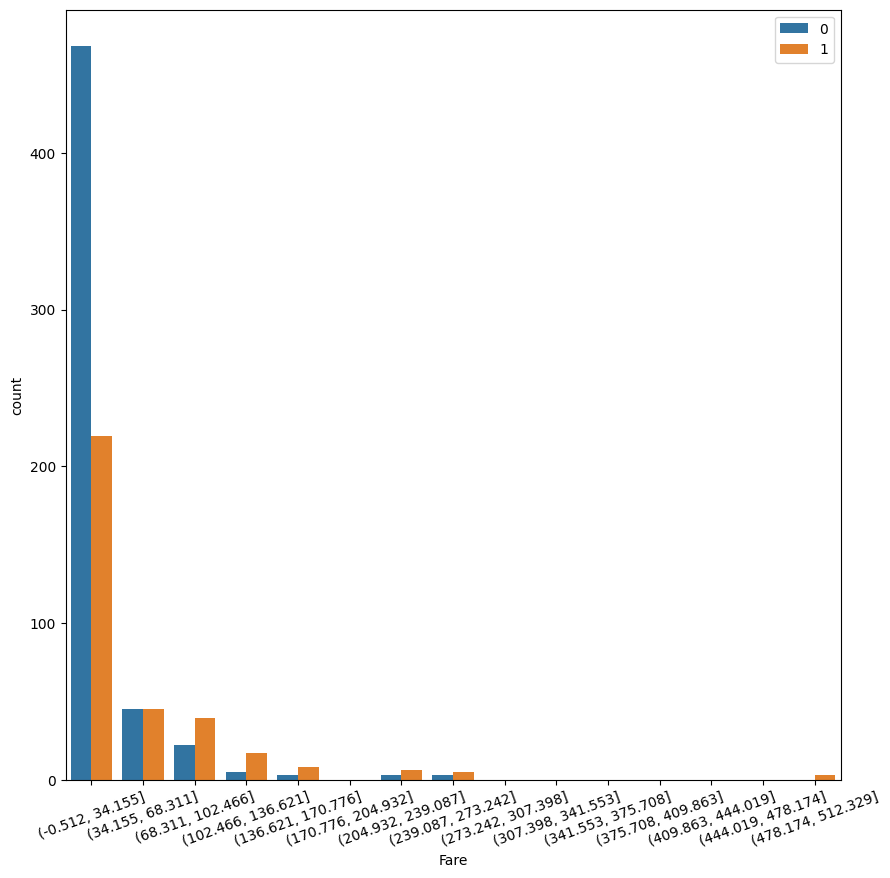

In [128]:
c = pd.cut(datas["Fare"], bins=15)
plt.figure(figsize=(10, 10))
sns.countplot(x=c, hue=datas["Survived"])
plt.xticks(rotation=20)
plt.legend(loc="upper right")

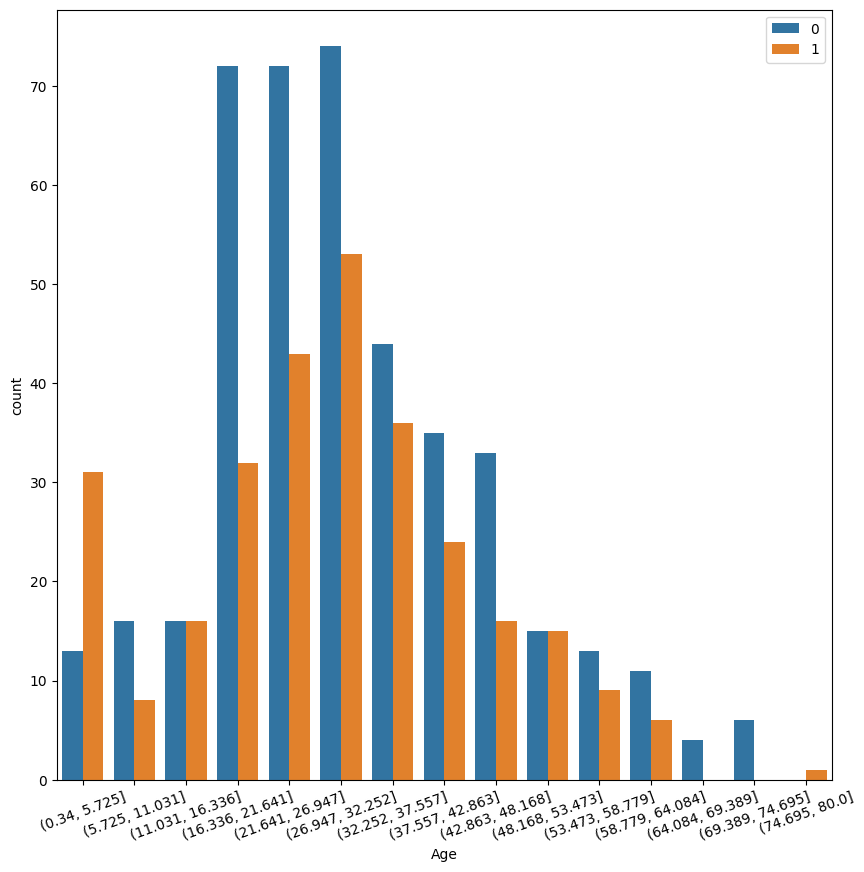

In [129]:
c = pd.cut(datas["Age"], bins=15)
plt.figure(figsize=(10, 10))
sns.countplot(x=c, hue=datas["Survived"])
plt.xticks(rotation=20)
plt.legend(loc="upper right")